# Stock Analysis using previous data and sentiments - Rida Shahwar

In [1]:
pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd

# Define the list of stock tickers
tickers = ['ONCO', 'CNEY', 'TNXP', 'APLD', 'KTTA']

# Set the time period (up to Sept 26, 2024)
start_date = '2024-01-01'
end_date = '2024-09-26'

# Download stock data for each ticker
data = yf.download(tickers, start=start_date, end=end_date)

# Save to a CSV file for later use
data.to_csv('stock_prices.csv')

# Display the first few rows
data.head()


[*********************100%***********************]  5 of 5 completed


Price                     Adj Close                           Close        \
Ticker                         APLD  CNEY   KTTA  ONCO   TNXP  APLD  CNEY   
Date                                                                        
2024-01-02 00:00:00+00:00      6.96  1.80  8.050  7.80  13.44  6.96  1.80   
2024-01-03 00:00:00+00:00      6.84  1.83  7.600  7.80  12.48  6.84  1.83   
2024-01-04 00:00:00+00:00      7.28  1.83  7.542  7.72  12.16  7.28  1.83   
2024-01-05 00:00:00+00:00      7.37  1.71  7.000  7.36  11.84  7.37  1.71   
2024-01-08 00:00:00+00:00      7.59  1.68  7.352  7.84  11.52  7.59  1.68   

Price                                          ...  Open                    \
Ticker                      KTTA  ONCO   TNXP  ...  APLD  CNEY  KTTA  ONCO   
Date                                           ...                           
2024-01-02 00:00:00+00:00  8.050  7.80  13.44  ...  6.83  1.86  7.40  8.08   
2024-01-03 00:00:00+00:00  7.600  7.80  12.48  ...  6.63  1.74  7.72  7.80   
2024-01-04 00:00:00+00:00  7.542  7.72  12.16  ...  6.84  1.80  7.51  7.96   
2024-01-05 00:00:00+00:00  7.000  7.36  11.84  ...  7.15  1.80  7.36  8.16   
2024-01-08 00:00:00+00:00  7.352  7.84  11.52  ...  7.40  1.65  7.00  7.60   

Price                              Volume                                
Ticker                      TNXP     APLD    CNEY    KTTA  ONCO    TNXP  
Date                                                                     
2024-01-02 00:00:00+00:00  13.12  2643200  119813  113400  2503  112131  
2024-01-03 00:00:00+00:00  13.44  3440200   83887   19600  3460   78800  
2024-01-04 00:00:00+00:00  12.48  3044200   79530   10100  3313   57728  
2024-01-05 00:00:00+00:00  12.16  2828300  141693   94200  3013   36122  
2024-01-08 00:00:00+00:00  11.84  2871200  129457   10100  6903   77134  

[5 rows x 30 columns]

In [3]:
pip install finvizfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00


In [4]:
pip install beautifulsoup4 requests

In [5]:
#Extracting News Articles
import yfinance as yf

# List of stock symbols
stocks = ['ONCO', 'CNEY', 'TNXP', 'APLD', 'KTTA']

# Function to fetch news headlines for each stock
def fetch_news(stocks):
    news_data = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        news = ticker.news  # Fetch the news related to the stock

        # Store the news headlines
        news_data[stock] = []
        for item in news:
            news_data[stock].append({
                'datetime': item['providerPublishTime'],  # Assuming this is in Unix time
                'headline': item['title'],
                'link': item['link']
            })

    return news_data

# Fetch news headlines
news_data = fetch_news(stocks)

# Display news for each stock
for stock, news in news_data.items():
    print(f"News for {stock}:")
    for item in news:
        print(f"{item['datetime']} - {item['headline']} - {item['link']}")
    print("\n")


News for ONCO:
1727988300 - Correction: Onconetix Announces Financing Through a $2.0 Million Private Placement of Series C Preferred Stock and Warrants, Establishes a $25 Million Equity Line of Credit - https://finance.yahoo.com/news/correction-onconetix-announces-financing-2-204500909.html
1727960700 - Onconetix Announces Financing Through a $2.0 Million Private Placement of Series C Preferred Stock and Warrants, Establishes a $25 Million Equity Line of Credit - https://finance.yahoo.com/news/onconetix-announces-financing-2-0-130500997.html
1726847100 - Onconetix, Inc. Announces 1-for-40 Reverse Stock Split and Results of the Annual Meeting of Stockholders - https://finance.yahoo.com/news/onconetix-inc-announces-1-40-154500172.html


News for CNEY:
1728657298 - CN Energy Regains Compliance With Nasdaq Minimum Market Value Rule - https://finance.yahoo.com/news/cn-energy-regains-compliance-nasdaq-143458137.html
1728651600 - CNEY Regains Compliance with Nasdaq Minimum Market Value of Pub

In [20]:
# Fetching Sentiments from above and doing the analysis

import yfinance as yf
import pandas as pd
# ... (Your existing code for fetching news data) ...

from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_sentiment(text):
    """
    Analyze the sentiment of a given text using TextBlob and VADER.
    """
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    analyzer = SentimentIntensityAnalyzer()
    vader_scores = analyzer.polarity_scores(text)
    compound_score = vader_scores['compound']

    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return polarity, compound_score, sentiment


# Create a list to store the news sentiment data
news_sentiment_data = []

for stock, news in news_data.items():
    for item in news:
        headline = item['headline']
        polarity, compound_score, sentiment = get_sentiment(headline)
        news_sentiment_data.append({
            'Stock': stock,
            'Headline': headline,
            'Polarity': polarity,
            'Compound Score': compound_score,
            'Sentiment': sentiment
        })

# Create a Pandas DataFrame from the news sentiment data
df_news_sentiment = pd.DataFrame(news_sentiment_data)

# Display the DataFrame
df_news_sentiment

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Stock,Headline,Polarity,Compound Score,Sentiment
0,ONCO,Correction: Onconetix Announces Financing Thro...,0.000000,0.3818,Neutral
1,ONCO,Onconetix Announces Financing Through a $2.0 M...,0.000000,0.3818,Neutral
2,ONCO,"Onconetix, Inc. Announces 1-for-40 Reverse Sto...",0.000000,0.0000,Neutral
3,CNEY,CN Energy Regains Compliance With Nasdaq Minim...,0.000000,0.5423,Neutral
4,CNEY,CNEY Regains Compliance with Nasdaq Minimum Ma...,0.000000,0.5574,Neutral
5,CNEY,CN Energy Group First Half 2024 Earnings: US$1...,0.041667,-0.0772,Positive
6,CNEY,Top Premarket Decliners,0.500000,0.2023,Positive
7,CNEY,Top Midday Decliners,0.500000,0.2023,Positive
8,CNEY,Update: CN Energy Reports Non-Compliance With ...,0.000000,0.5106,Neutral
9,CNEY,CN Energy Reports Non-Compliance With Nasdaq's...,0.000000,0.2732,Neutral


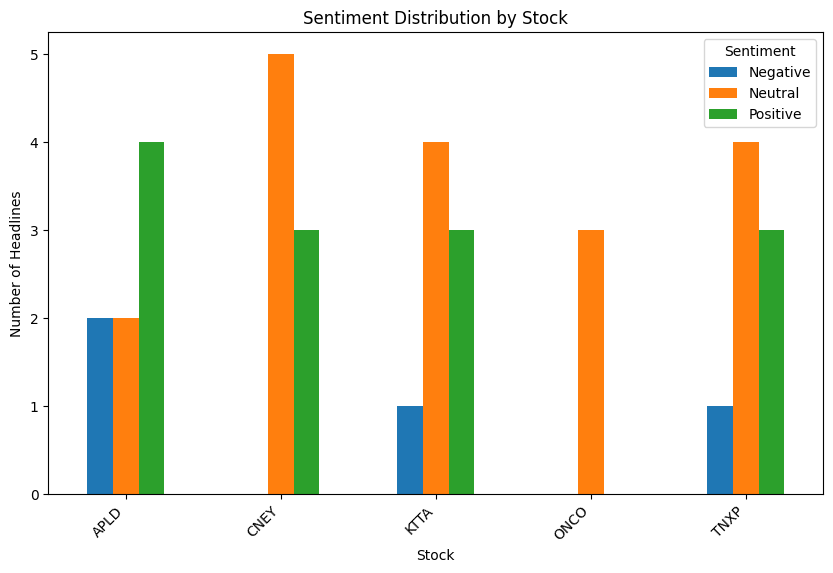

In [25]:
# @title Sentiment Distribution by Stock

import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a pandas DataFrame called 'df_news_sentiment'

sentiment_counts = df_news_sentiment.groupby(['Stock', 'Sentiment'])['Sentiment'].count().unstack()

sentiment_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution by Stock')
plt.xlabel('Stock')
plt.ylabel('Number of Headlines')
plt.xticks(rotation=45, ha='right')
_ = plt.legend(title='Sentiment')

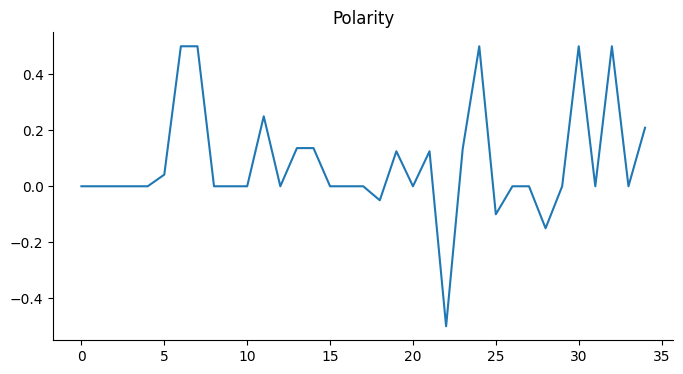

In [24]:
# @title Polarity

from matplotlib import pyplot as plt
df_news_sentiment['Polarity'].plot(kind='line', figsize=(8, 4), title='Polarity')
plt.gca().spines[['top', 'right']].set_visible(False)

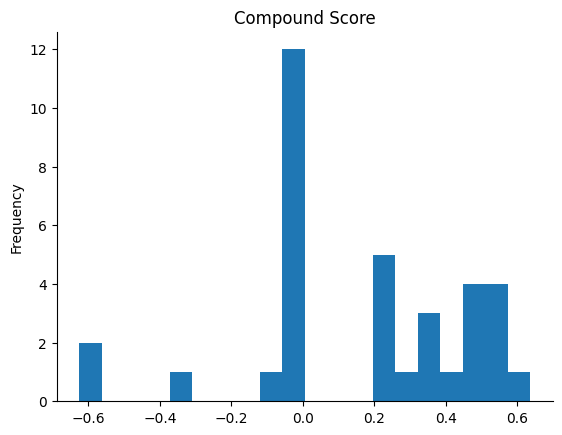

In [23]:
# @title Compound Score

from matplotlib import pyplot as plt
df_news_sentiment['Compound Score'].plot(kind='hist', bins=20, title='Compound Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

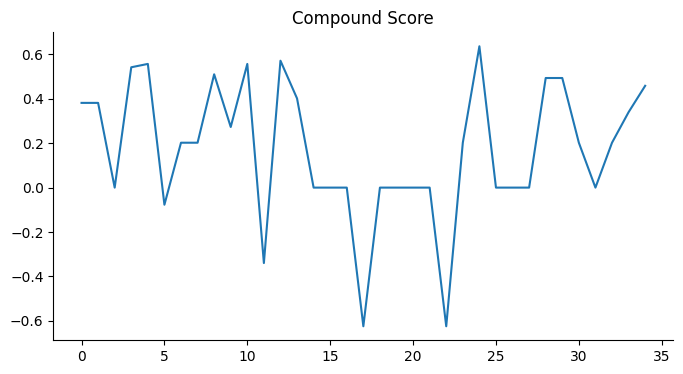

In [22]:
# @title Compound Score

from matplotlib import pyplot as plt
df_news_sentiment['Compound Score'].plot(kind='line', figsize=(8, 4), title='Compound Score')
plt.gca().spines[['top', 'right']].set_visible(False)

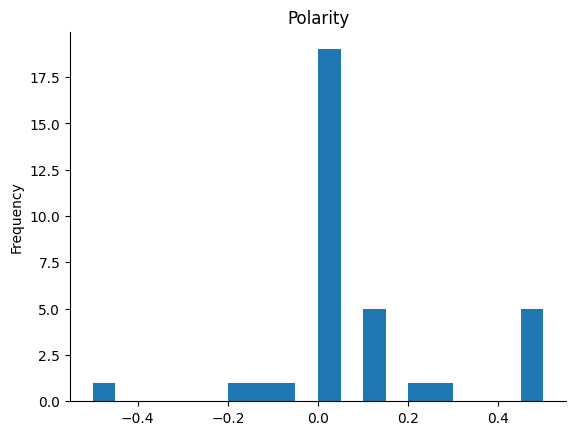

In [21]:
# @title Polarity

from matplotlib import pyplot as plt
df_news_sentiment['Polarity'].plot(kind='hist', bins=20, title='Polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

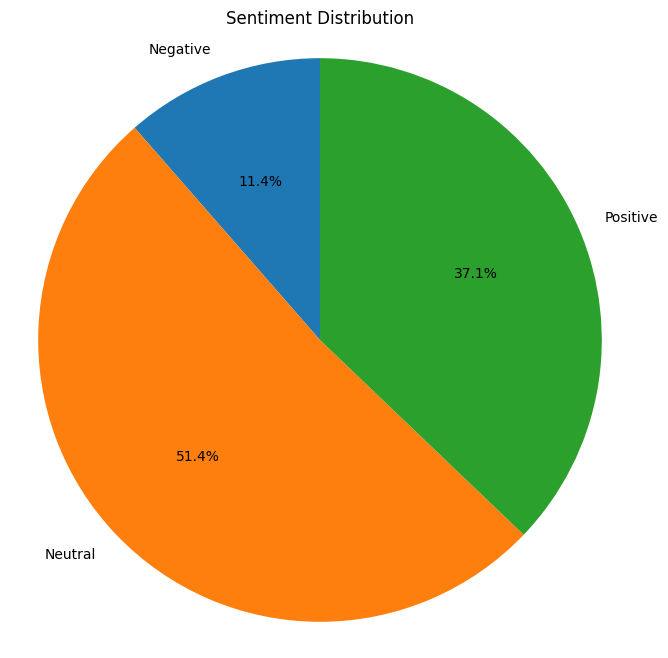

In [26]:
# prompt: generate pie chart for the above data

# Assuming your data is in a pandas DataFrame called 'df_news_sentiment'

sentiment_counts = df_news_sentiment.groupby('Sentiment')['Sentiment'].count()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [8]:
pip install matplotlib

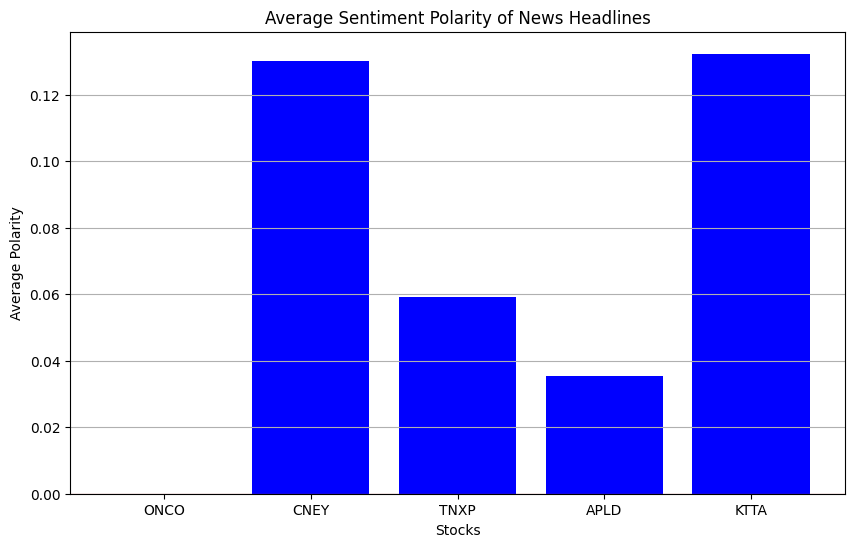

In [27]:
import matplotlib.pyplot as plt

# Calculate average sentiment polarity for each stock
average_sentiment = {}
for stock, news in news_data.items():
    total_polarity = sum(item['polarity'] for item in news)
    average_sentiment[stock] = total_polarity / len(news)

# Create a bar chart
stocks = list(average_sentiment.keys())
average_polarities = list(average_sentiment.values())

plt.figure(figsize=(10, 6))
plt.bar(stocks, average_polarities, color='blue')
plt.title('Average Sentiment Polarity of News Headlines')
plt.xlabel('Stocks')
plt.ylabel('Average Polarity')
plt.axhline(0, color='red', linewidth=0.8)  # Line at 0 for reference
plt.grid(axis='y')

# Show the plot
plt.show()


In [10]:
#Installing the Python modules to be used
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

In [37]:
#Importing the modules for use
import requests
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.simplefilter("ignore")

In [38]:
onco = yf.Ticker('ONCO')

In [39]:
#extracting oncentrix's stock data (dated since the beginning)
onco_data = onco.history(period='max')

#resetting the index (and retrieving dates as a coloumn, 'Date')
onco_data.reset_index(inplace=True)

#to preview the first 5 enteries of Tesla's stock data
onco_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-02-18 00:00:00-05:00,2000.000000,2300.000000,1520.000000,2296.000000,3295,0.0,0.0
1,2022-02-22 00:00:00-05:00,2700.000000,3636.000000,2004.000000,2278.800049,2683,0.0,0.0
2,2022-02-23 00:00:00-05:00,1895.599976,2072.000000,1302.000000,1992.000000,1478,0.0,0.0
3,2022-02-24 00:00:00-05:00,1600.800049,1780.000000,1459.199951,1712.199951,1080,0.0,0.0
4,2022-02-25 00:00:00-05:00,1559.599976,1779.599976,1504.479980,1774.000000,903,0.0,0.0


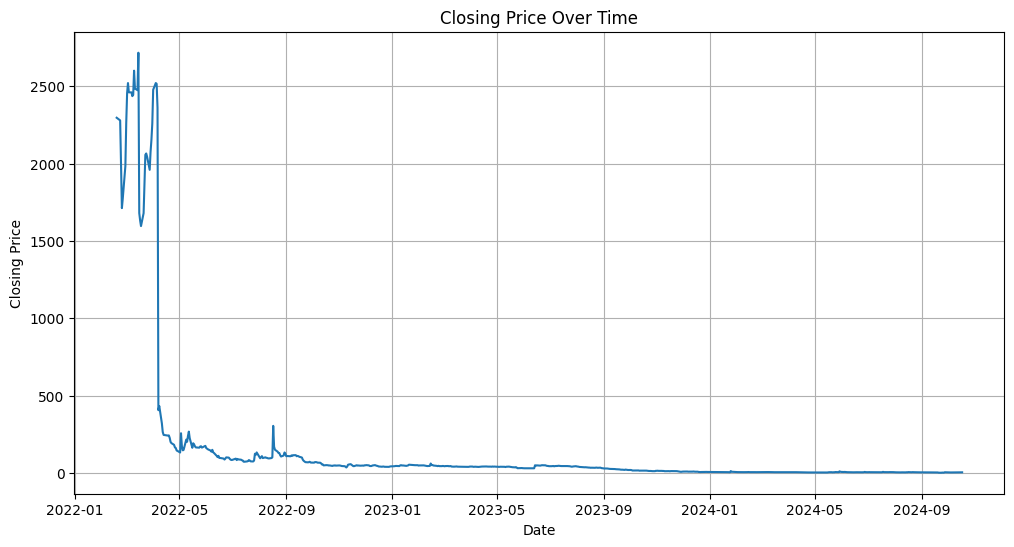

<Figure size 1200x800 with 0 Axes>

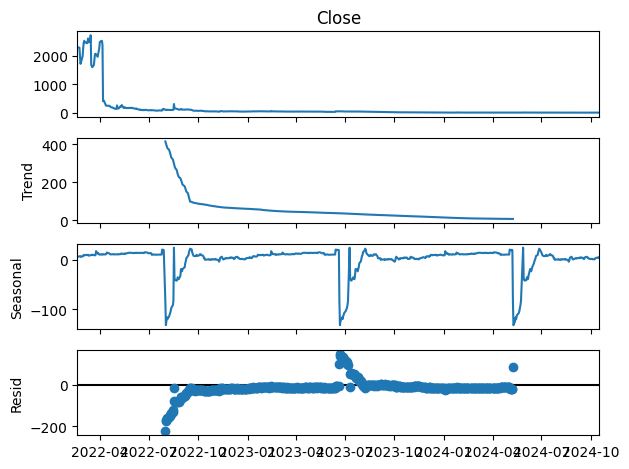

ADF Statistic: -5.003532108321836
p-value: 2.1838692839784442e-05


In [40]:
#Time series analysis for onco_data

import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime objects
onco_data['Date'] = pd.to_datetime(onco_data['Date'])

# Set the 'Date' column as the index
onco_data = onco_data.set_index('Date')

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(onco_data['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


# Decompose the time series into its trend, seasonality, and residual components
from statsmodels.tsa.seasonal import seasonal_decompose

# Calculate the period dynamically based on the data frequency
# Assuming the data is daily, calculate the approximate number of days in a year
period = int(len(onco_data) / (len(onco_data.index.year.unique())))

# Perform seasonal decomposition with the calculated period
result = seasonal_decompose(onco_data['Close'], model='additive', period=period)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
result.plot()
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller

result = adfuller(onco_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the p-value is less than 0.05, the series is likely stationary
# If not, consider differencing the series to make it stationary


<Figure size 1200x600 with 0 Axes>

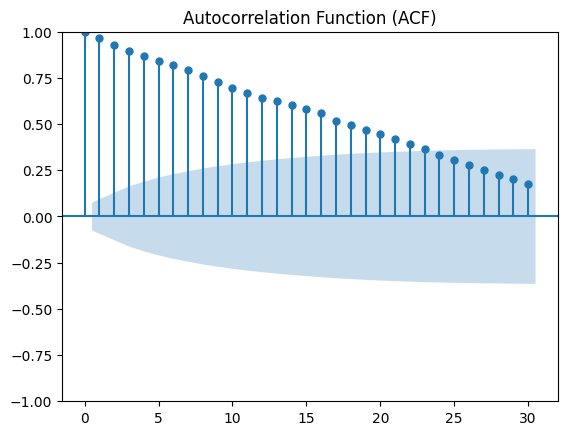

<Figure size 1200x600 with 0 Axes>

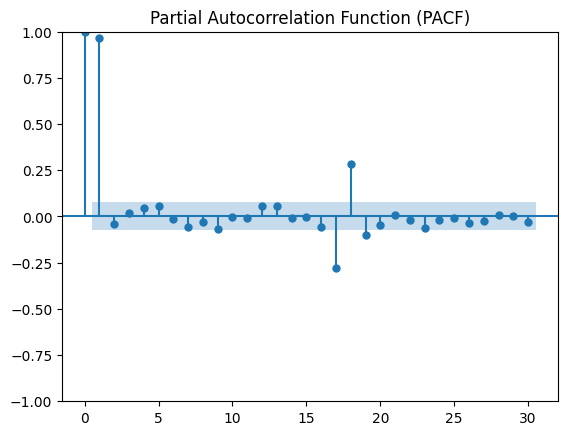

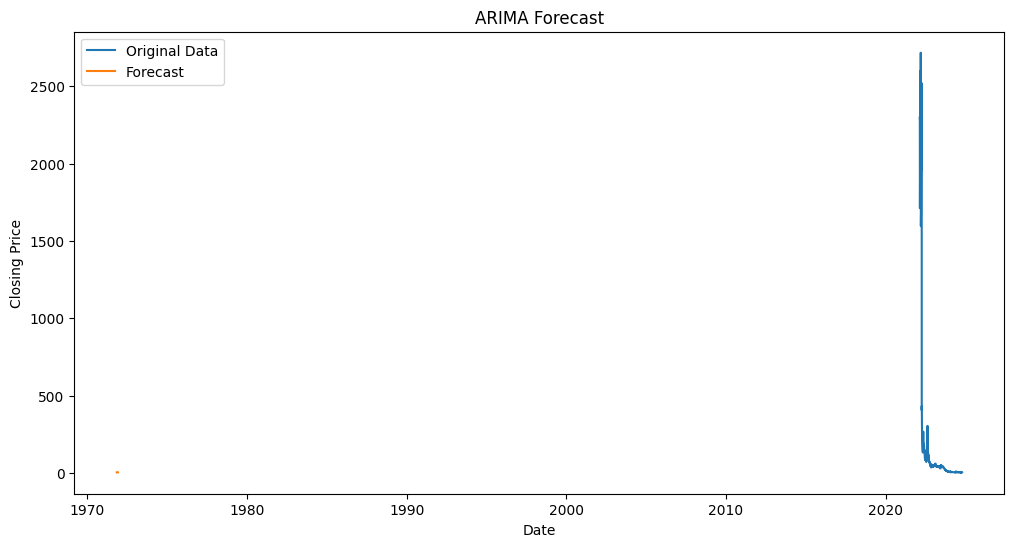

In [41]:
# # - Autocorrelation and partial autocorrelation plots (ACF and PACF) to identify the order of ARIMA model
# # - Forecasting using ARIMA or other time series models

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#'onco_data['Close']' is time series data

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(onco_data['Close'], lags=30)  # Adjust lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(onco_data['Close'], lags=30)  # Adjust lags as needed
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Based on ACF and PACF plots, identifying potential AR and MA orders for ARIMA model.


# Example of ARIMA forecasting (you'll need to determine appropriate order (p, d, q) based on ACF and PACF)
from statsmodels.tsa.arima.model import ARIMA

# Assuming you determined the order (p, d, q) to be (5, 1, 0)
model = ARIMA(onco_data['Close'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
forecast_steps = 30  # Number of steps to forecast
forecast = model_fit.predict(start=len(onco_data), end=len(onco_data) + forecast_steps - 1)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(onco_data['Close'], label='Original Data')
plt.plot(forecast, label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# You can evaluate the forecast using metrics like RMSE, MAE, etc.
# You can also use other forecasting models like Prophet or LSTM depending on your specific needs.


In [48]:
#now using a machine learning algorithm for predicting the stock

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'onco_data' is your DataFrame with stock data

# Prepare the data for machine learning
# Add features (e.g., moving averages, previous day's closing price)
onco_data['PreviousClose'] = onco_data['Close'].shift(1)
onco_data['MovingAverage5'] = onco_data['Close'].rolling(window=5).mean()
onco_data['MovingAverage20'] = onco_data['Close'].rolling(window=20).mean()

# Remove rows with NaN values
onco_data.dropna(inplace=True)

# Define features (X) and target variable (y)
X = onco_data[['PreviousClose', 'MovingAverage5', 'MovingAverage20']]
y = onco_data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 6.054517885875308


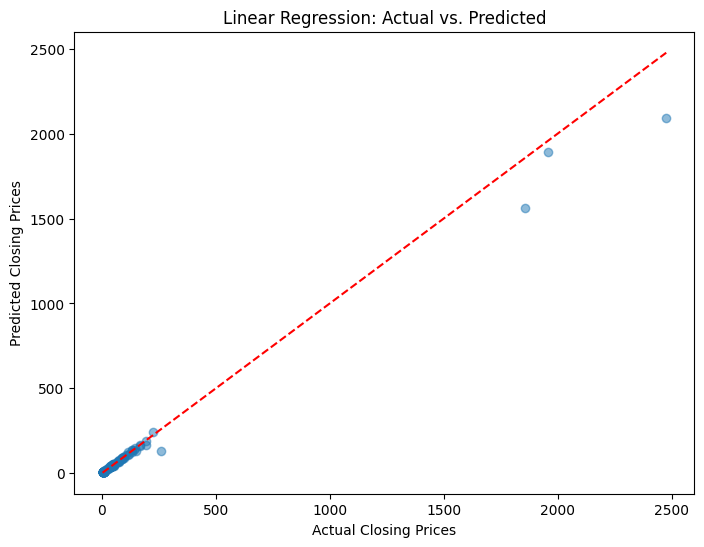

In [47]:
# prompt: make a plot for the linear regression which is not line plot

import matplotlib.pyplot as plt
import numpy as np

# y_test and y_pred from your linear regression model

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Closing Prices")
plt.ylabel("Predicted Closing Prices")
plt.title("Linear Regression: Actual vs. Predicted")

# Add a diagonal line representing perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

In [49]:
#fetching all the other stock data
cney = yf.Ticker('CNEY')
tnxp = yf.Ticker('TNXP')
apld = yf.Ticker('APLD')
ktta = yf.Ticker('KTTA')

In [50]:
cney_data = cney.history(period='max')
cney_data.reset_index(inplace=True)
cney_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-02-05 00:00:00-05:00,240.000000,264.000000,137.399994,172.199997,61700,0.0,0.0
1,2021-02-08 00:00:00-05:00,165.000000,165.000000,145.500000,153.000000,20127,0.0,0.0
2,2021-02-09 00:00:00-05:00,162.000000,163.500000,150.000000,154.500000,6010,0.0,0.0
3,2021-02-10 00:00:00-05:00,154.500000,208.800003,151.500000,203.699997,21073,0.0,0.0
4,2021-02-11 00:00:00-05:00,216.899994,229.800003,201.000000,213.000000,14767,0.0,0.0


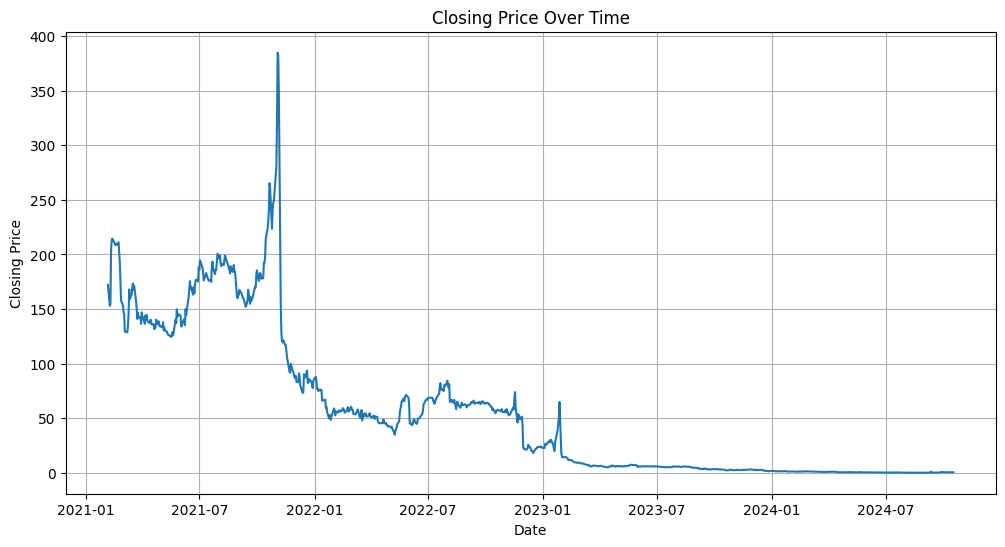

<Figure size 1200x800 with 0 Axes>

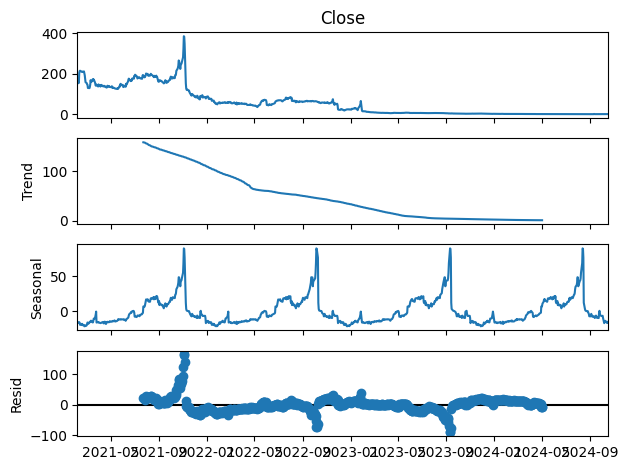

ADF Statistic: -1.5966717083301316
p-value: 0.4852651842281005


In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# The 'Date' column is likely already the index, so reset it to a column
cney_data = cney_data.reset_index()

# Convert the 'Date' column to datetime objects
cney_data['Date'] = pd.to_datetime(cney_data['Date'])

# Set the 'Date' column as the index
cney_data = cney_data.set_index('Date')

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(cney_data['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


# Decompose the time series into its trend, seasonality, and residual components
from statsmodels.tsa.seasonal import seasonal_decompose

# Calculate the period dynamically based on the data frequency
# Assuming the data is daily, calculate the approximate number of days in a year
period = int(len(cney_data) / (len(cney_data.index.year.unique())))

# Perform seasonal decomposition with the calculated period
result = seasonal_decompose(cney_data['Close'], model='additive', period=period)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
result.plot()
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller

result = adfuller(cney_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

<Figure size 1200x600 with 0 Axes>

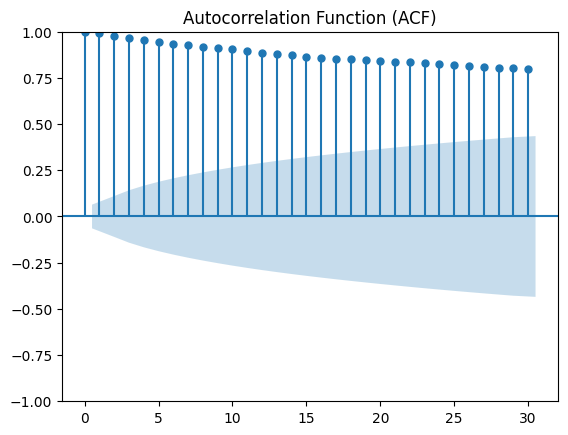

<Figure size 1200x600 with 0 Axes>

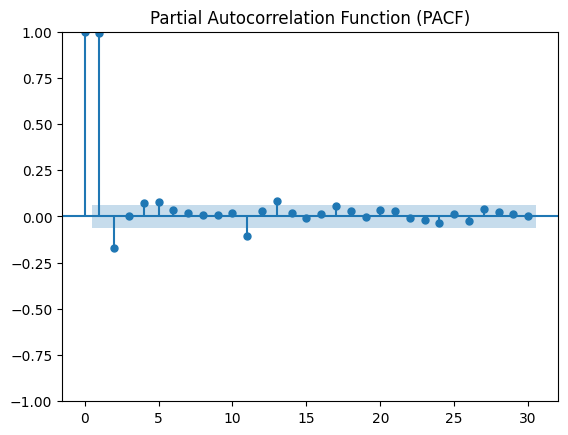

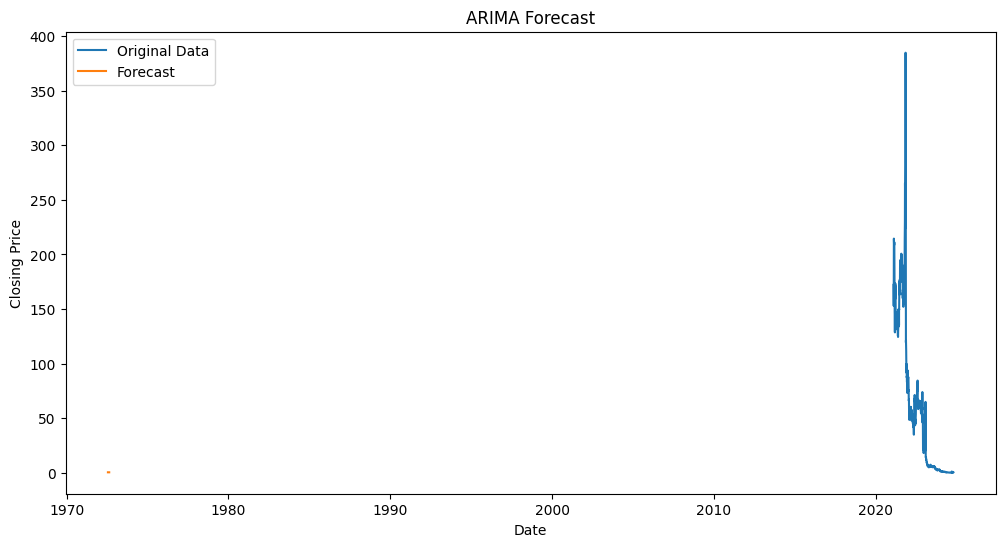

In [57]:
#'cney_data['Close']' is series data

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(cney_data['Close'], lags=30)  # Adjust lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(cney_data['Close'], lags=30)  # Adjust lags as needed
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Based on ACF and PACF plots, identifying potential AR and MA orders for ARIMA model.


# Example of ARIMA forecasting (you'll need to determine appropriate order (p, d, q) based on ACF and PACF)

# Assuming you determined the order (p, d, q) to be (5, 1, 0)
model = ARIMA(cney_data['Close'], order=(5, 1, 0))  # Replace with your determined order
model_fit = model.fit()

# Make predictions
forecast_steps = 30  # Number of steps to forecast
forecast = model_fit.predict(start=len(cney_data), end=len(cney_data) + forecast_steps - 1)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(cney_data['Close'], label='Original Data')
plt.plot(forecast, label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# You can evaluate the forecast using metrics like RMSE, MAE, etc.
# You can also use other forecasting models like Prophet or LSTM depending on your specific needs.

In [51]:
tnxp_data = tnxp.history(period='max')
tnxp_data.reset_index(inplace=True)
tnxp_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-05-10 00:00:00-04:00,192000000.0,192000000.0,192000000.0,192000000.0,0,0.0,0.0
1,2012-05-11 00:00:00-04:00,192000000.0,192000000.0,192000000.0,192000000.0,0,0.0,0.0
2,2012-05-14 00:00:00-04:00,192000000.0,192000000.0,192000000.0,192000000.0,0,0.0,0.0
3,2012-05-15 00:00:00-04:00,192000000.0,192000000.0,192000000.0,192000000.0,0,0.0,0.0
4,2012-05-16 00:00:00-04:00,168960000.0,168960000.0,168960000.0,168960000.0,0,0.0,0.0


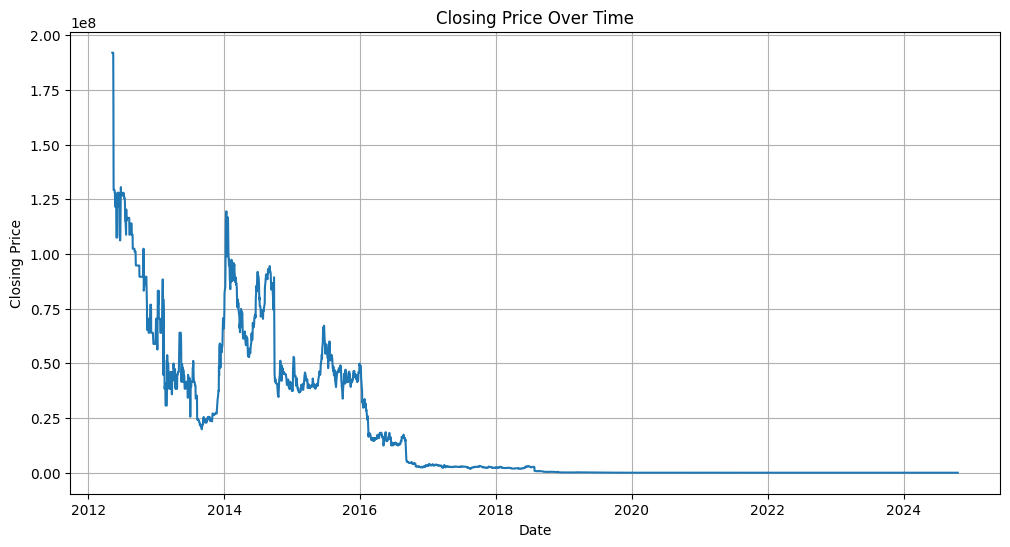

<Figure size 1200x800 with 0 Axes>

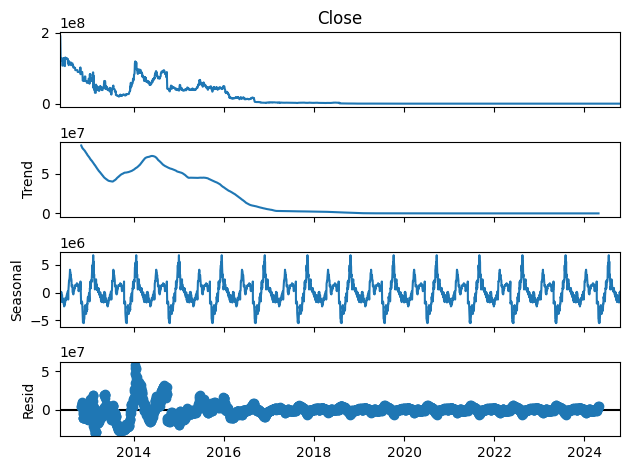

ADF Statistic: -3.584552675451706
p-value: 0.006063308058292409


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# The 'Date' column is likely already the index, so reset it to a column
tnxp_data = tnxp_data.reset_index()

# Convert the 'Date' column to datetime objects
tnxp_data['Date'] = pd.to_datetime(tnxp_data['Date'])

# Set the 'Date' column as the index
tnxp_data = tnxp_data.set_index('Date')

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(tnxp_data['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


# Decompose the time series into its trend, seasonality, and residual components
from statsmodels.tsa.seasonal import seasonal_decompose

# Calculate the period dynamically based on the data frequency
# Assuming the data is daily, calculate the approximate number of days in a year
period = int(len(tnxp_data) / (len(tnxp_data.index.year.unique())))

# Perform seasonal decomposition with the calculated period
result = seasonal_decompose(tnxp_data['Close'], model='additive', period=period)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
result.plot()
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller

result = adfuller(tnxp_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

<Figure size 1200x600 with 0 Axes>

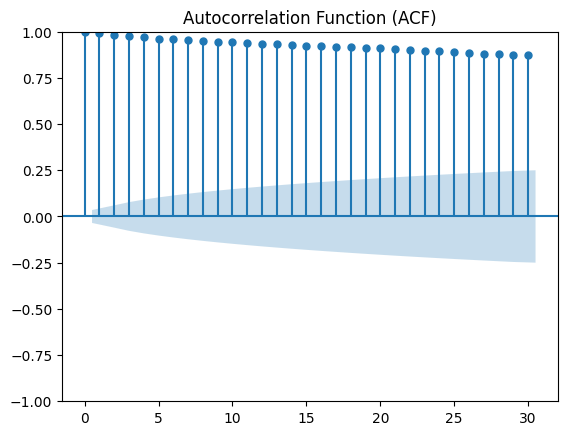

<Figure size 1200x600 with 0 Axes>

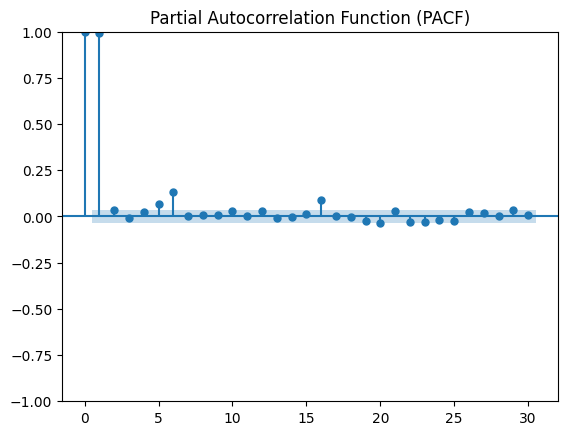

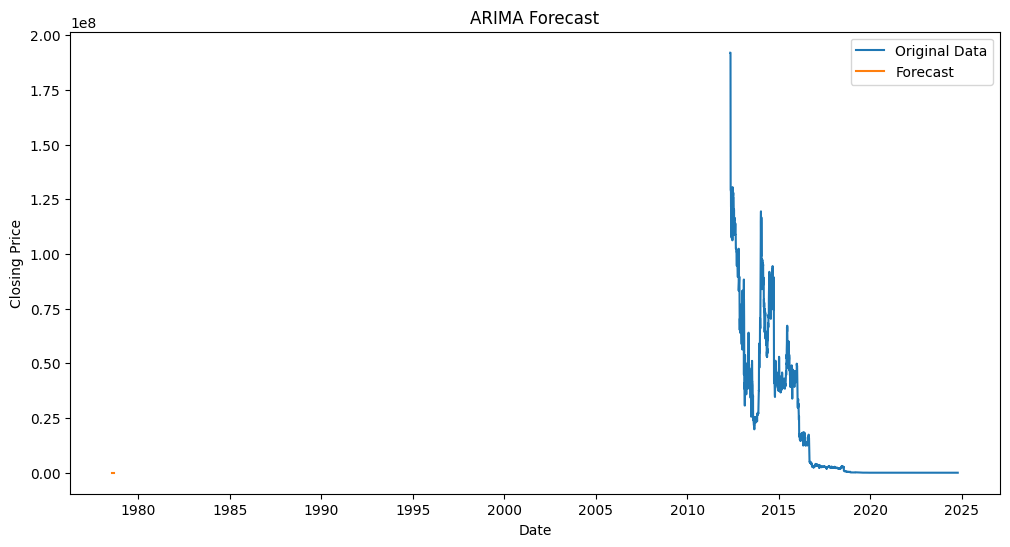

In [59]:
#'tnxp_data['Close']' is time series data

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(tnxp_data['Close'], lags=30)  # Adjust lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(tnxp_data['Close'], lags=30)  # Adjust lags as needed
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Example of ARIMA forecasting (you'll need to determine appropriate order (p, d, q) based on ACF and PACF)

# Assuming you determined the order (p, d, q) to be (5, 1, 0)
model = ARIMA(tnxp_data['Close'], order=(5, 1, 0))  # Replace with your determined order
model_fit = model.fit()

# Make predictions
forecast_steps = 30  # Number of steps to forecast
forecast = model_fit.predict(start=len(tnxp_data), end=len(tnxp_data) + forecast_steps - 1)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(tnxp_data['Close'], label='Original Data')
plt.plot(forecast, label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [52]:
apld_data = apld.history(period='max')
apld_data.reset_index(inplace=True)
apld_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-04-13 00:00:00-04:00,4.70,4.900,4.50,4.85,3116200,0.0,0.166667
1,2022-04-14 00:00:00-04:00,4.70,4.900,4.58,4.78,372000,0.0,0.000000
2,2022-04-18 00:00:00-04:00,4.60,4.668,4.46,4.50,145100,0.0,0.000000
3,2022-04-19 00:00:00-04:00,4.50,4.800,4.45,4.75,319900,0.0,0.000000
4,2022-04-20 00:00:00-04:00,4.75,4.770,4.60,4.70,211900,0.0,0.000000


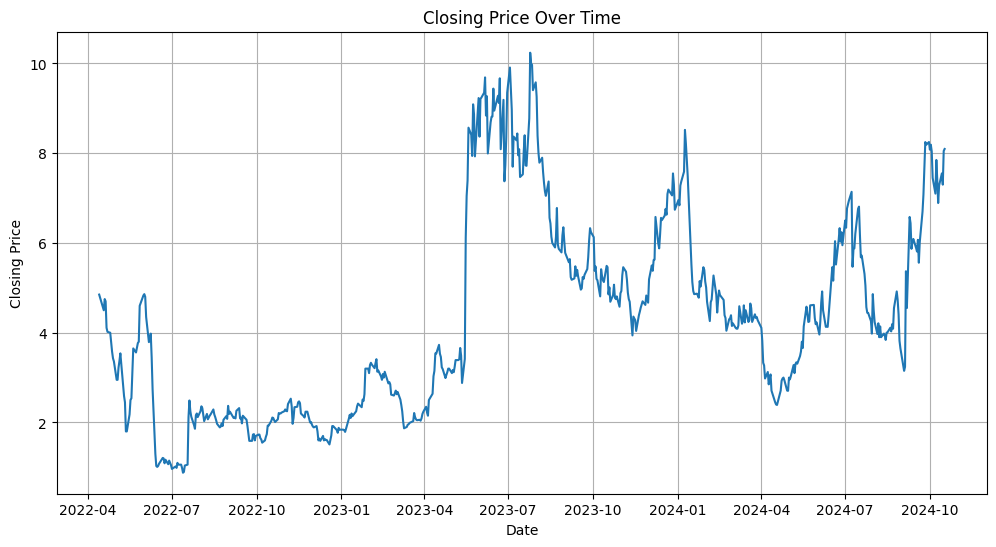

<Figure size 1200x800 with 0 Axes>

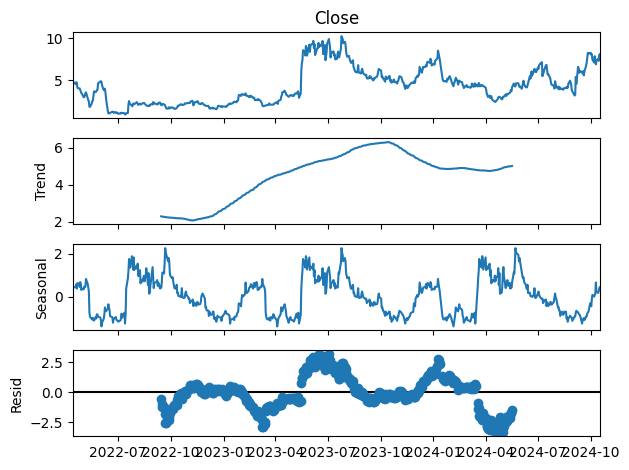

ADF Statistic: -1.977895625923381
p-value: 0.29634839592269385


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# The 'Date' column is likely already the index, so reset it to a column
apld_data = apld_data.reset_index()

# Convert the 'Date' column to datetime objects
apld_data['Date'] = pd.to_datetime(apld_data['Date'])

# Set the 'Date' column as the index
apld_data = apld_data.set_index('Date')

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(apld_data['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


# Decompose the time series into its trend, seasonality, and residual components
from statsmodels.tsa.seasonal import seasonal_decompose

# Calculate the period dynamically based on the data frequency
# Assuming the data is daily, calculate the approximate number of days in a year
period = int(len(apld_data) / (len(apld_data.index.year.unique())))

# Perform seasonal decomposition with the calculated period
result = seasonal_decompose(apld_data['Close'], model='additive', period=period)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
result.plot()
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller

result = adfuller(apld_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

<Figure size 1200x600 with 0 Axes>

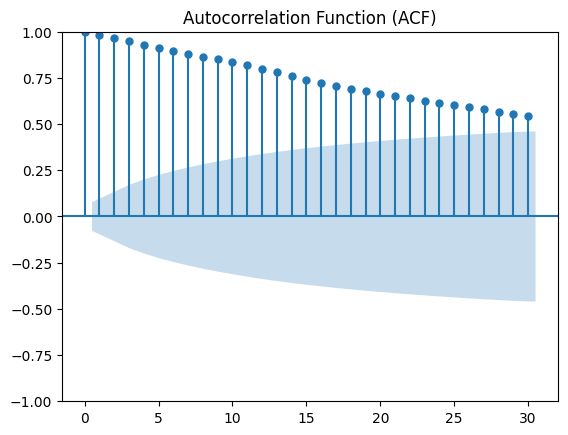

<Figure size 1200x600 with 0 Axes>

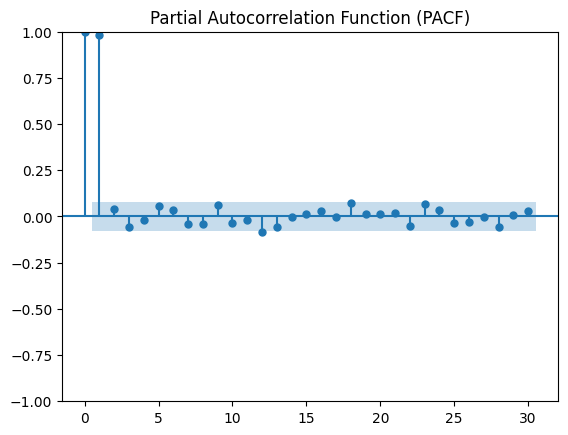

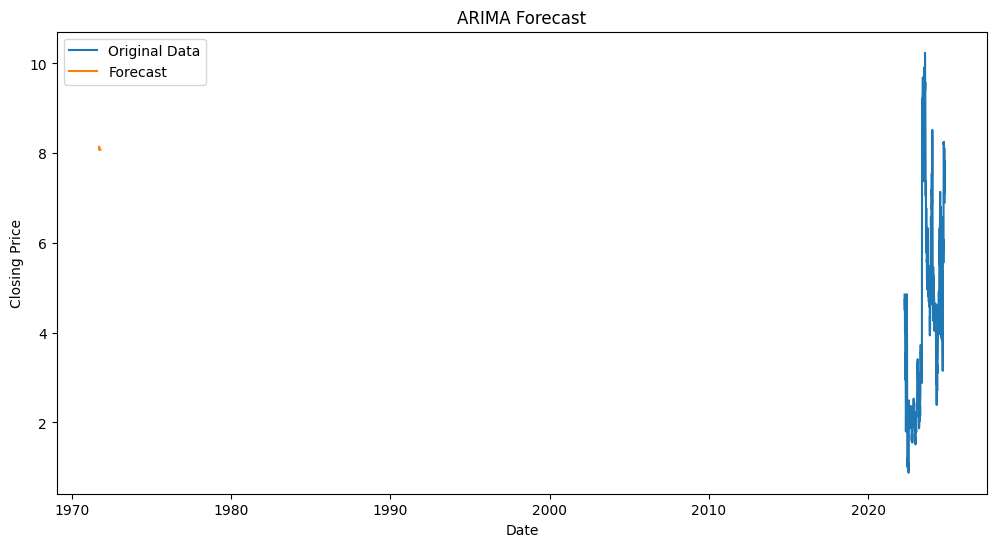

In [62]:


#'apld_data['Close']' is time series data

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(apld_data['Close'], lags=30)  # Adjust lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(apld_data['Close'], lags=30)  # Adjust lags as needed
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Based on ACF and PACF plots, identifying potential AR and MA orders for your ARIMA model.


# Example of ARIMA forecasting (you'll need to determine appropriate order (p, d, q) based on ACF and PACF)

# Assuming you determined the order (p, d, q) to be (5, 1, 0)
model = ARIMA(apld_data['Close'], order=(5, 1, 0))  # Replace with your determined order
model_fit = model.fit()

# Make predictions
forecast_steps = 30  # Number of steps to forecast
forecast = model_fit.predict(start=len(apld_data), end=len(apld_data) + forecast_steps - 1)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(apld_data['Close'], label='Original Data')
plt.plot(forecast, label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [53]:
ktta_data = cney.history(period='max')
ktta_data.reset_index(inplace=True)
ktta_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-02-05 00:00:00-05:00,240.000000,264.000000,137.399994,172.199997,61700,0.0,0.0
1,2021-02-08 00:00:00-05:00,165.000000,165.000000,145.500000,153.000000,20127,0.0,0.0
2,2021-02-09 00:00:00-05:00,162.000000,163.500000,150.000000,154.500000,6010,0.0,0.0
3,2021-02-10 00:00:00-05:00,154.500000,208.800003,151.500000,203.699997,21073,0.0,0.0
4,2021-02-11 00:00:00-05:00,216.899994,229.800003,201.000000,213.000000,14767,0.0,0.0


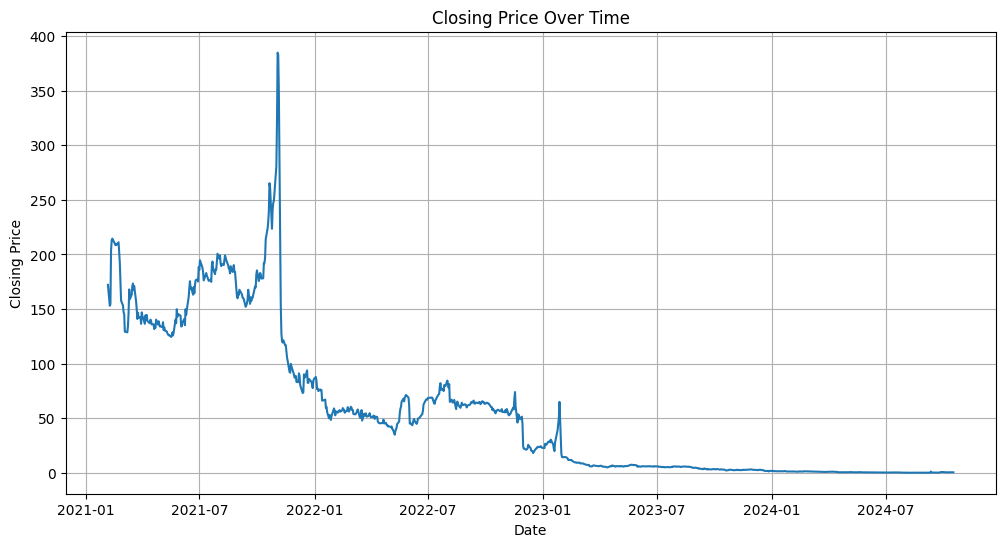

<Figure size 1200x800 with 0 Axes>

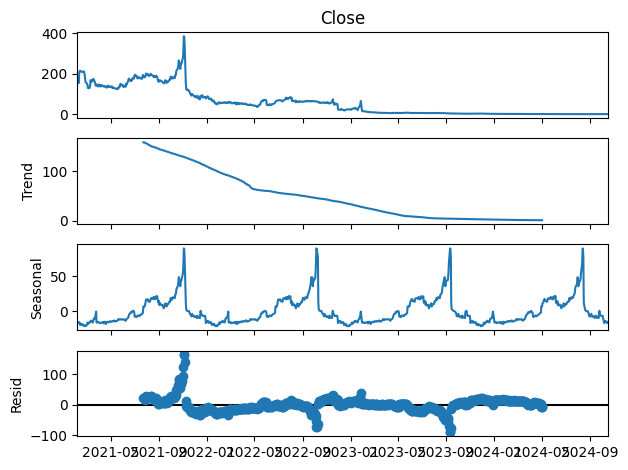

ADF Statistic: -1.5966878839736667
p-value: 0.4852570606325231


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# The 'Date' column is likely already the index, so reset it to a column
ktta_data = ktta_data.reset_index()

# Convert the 'Date' column to datetime objects
ktta_data['Date'] = pd.to_datetime(ktta_data['Date'])

# Set the 'Date' column as the index
ktta_data = ktta_data.set_index('Date')

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(ktta_data['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


# Decompose the time series into its trend, seasonality, and residual components
from statsmodels.tsa.seasonal import seasonal_decompose

# Calculate the period dynamically based on the data frequency
# Assuming the data is daily, calculate the approximate number of days in a year
period = int(len(ktta_data) / (len(ktta_data.index.year.unique())))

# Perform seasonal decomposition with the calculated period
result = seasonal_decompose(ktta_data['Close'], model='additive', period=period)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
result.plot()
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller

result = adfuller(ktta_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

<Figure size 1200x600 with 0 Axes>

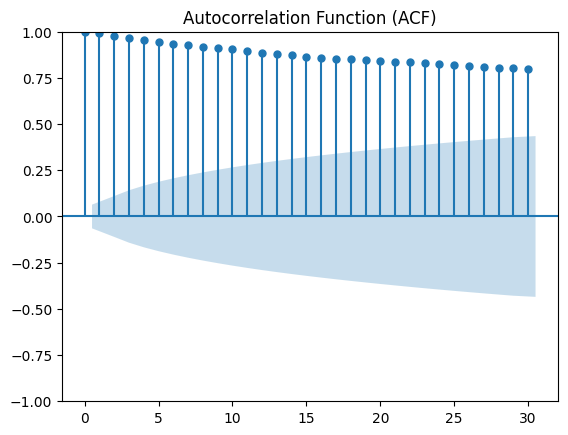

<Figure size 1200x600 with 0 Axes>

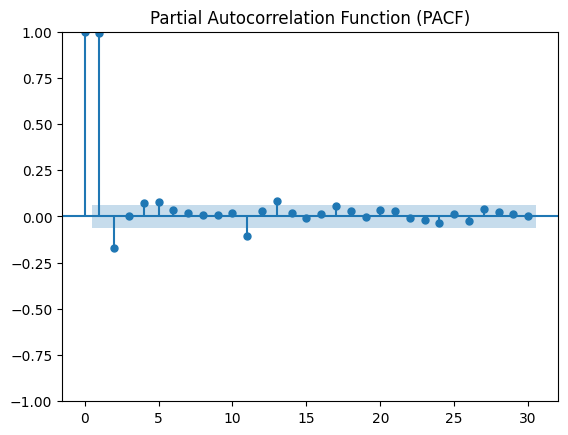

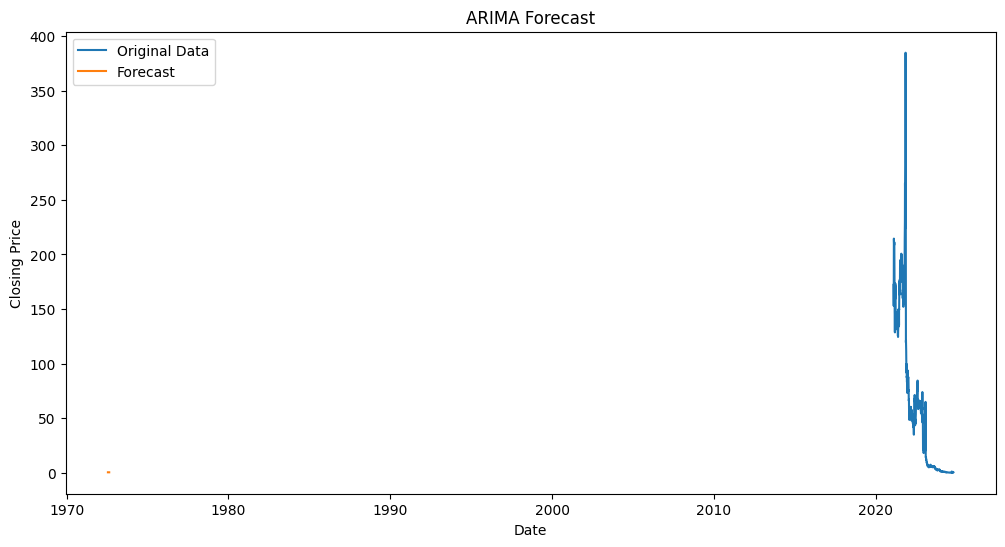

In [64]:
#'ktta_data['Close']' is your time series data

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(ktta_data['Close'], lags=30)  # Adjust lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(ktta_data['Close'], lags=30)  # Adjust lags as needed
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Based on ACF and PACF plots, identifing potential AR and MA orders for your ARIMA model.

# Assuming you determined the order (p, d, q) to be (5, 1, 0)
model = ARIMA(ktta_data['Close'], order=(5, 1, 0))  # Replace with your determined order
model_fit = model.fit()

# Make predictions
forecast_steps = 30  # Number of steps to forecast
forecast = model_fit.predict(start=len(ktta_data), end=len(ktta_data) + forecast_steps - 1)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(ktta_data['Close'], label='Original Data')
plt.plot(forecast, label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [65]:
# USing ML for prediction

def prepare_data_for_ml(df):
  """Prepares stock data for machine learning by adding features."""
  df['PreviousClose'] = df['Close'].shift(1)
  df['MovingAverage5'] = df['Close'].rolling(window=5).mean()
  df['MovingAverage20'] = df['Close'].rolling(window=20).mean()
  df.dropna(inplace=True)
  return df

# Prepare data for each stock
onco_data_ml = prepare_data_for_ml(onco_data)
cney_data_ml = prepare_data_for_ml(cney_data)
tnxp_data_ml = prepare_data_for_ml(tnxp_data)
apld_data_ml = prepare_data_for_ml(apld_data)
ktta_data_ml = prepare_data_for_ml(ktta_data)

def train_and_evaluate_model(df):
  """Trains a linear regression model and evaluates its performance."""
  X = df[['PreviousClose', 'MovingAverage5', 'MovingAverage20']]
  y = df['Close']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  return model, rmse

# Train and evaluate models for each stock
onco_model, onco_rmse = train_and_evaluate_model(onco_data_ml)
cney_model, cney_rmse = train_and_evaluate_model(cney_data_ml)
tnxp_model, tnxp_rmse = train_and_evaluate_model(tnxp_data_ml)
apld_model, apld_rmse = train_and_evaluate_model(apld_data_ml)
ktta_model, ktta_rmse = train_and_evaluate_model(ktta_data_ml)

# Print the RMSE for each model
print(f"ONCO RMSE: {onco_rmse}")
print(f"CNEY RMSE: {cney_rmse}")
print(f"TNXP RMSE: {tnxp_rmse}")
print(f"APLD RMSE: {apld_rmse}")
print(f"KTTA RMSE: {ktta_rmse}")

# You can now use these trained models to make predictions on new data.



ONCO RMSE: 17.440988011963213
CNEY RMSE: 5.322629557697969
TNXP RMSE: 2197765.867050925
APLD RMSE: 0.36017876103628765
KTTA RMSE: 5.322630024812404


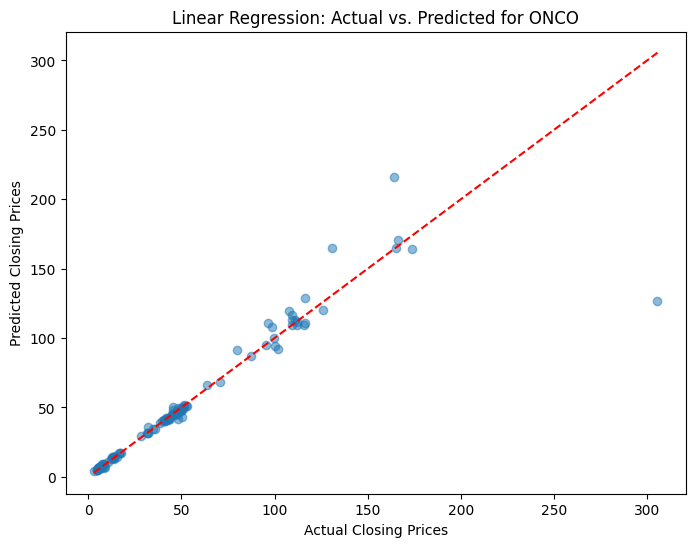

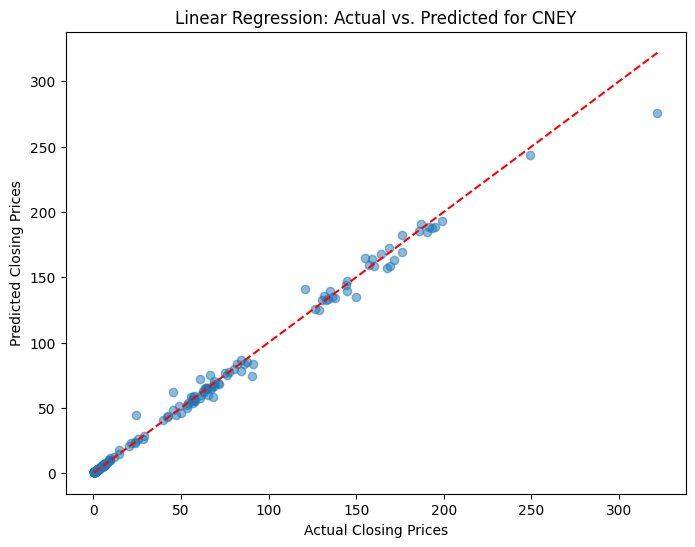

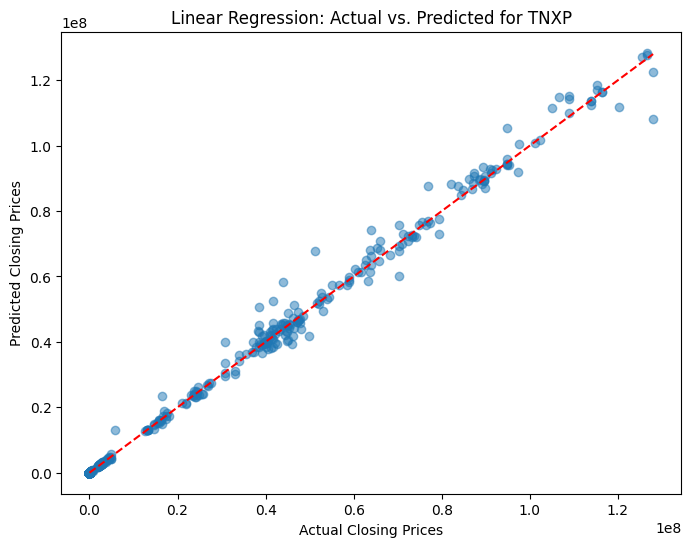

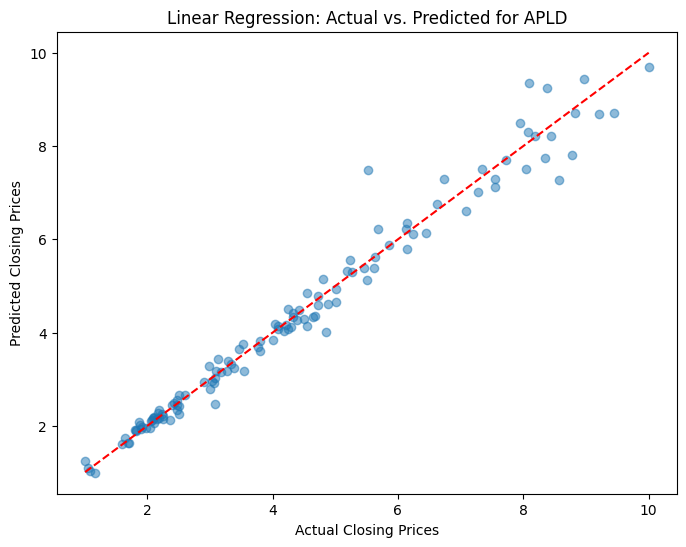

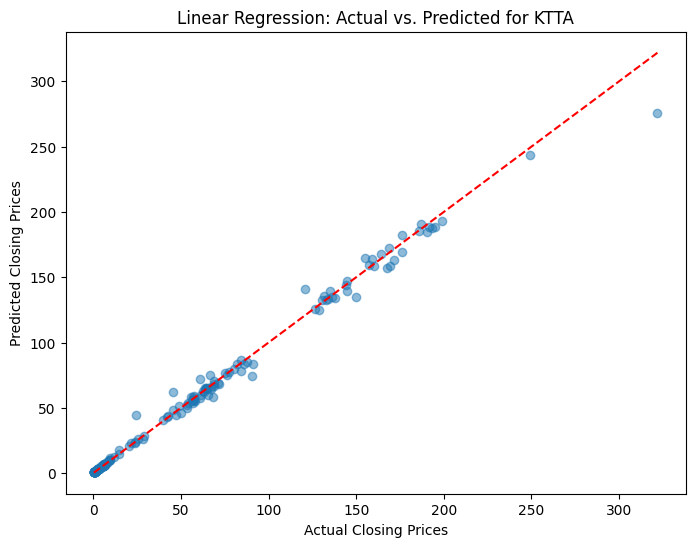

In [67]:
# y_test and y_pred from your linear regression model for each stock

def plot_actual_vs_predicted(y_test, y_pred, stock_name):
  """Plots a scatter plot of actual vs. predicted closing prices for a stock."""
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)
  plt.xlabel("Actual Closing Prices")
  plt.ylabel("Predicted Closing Prices")
  plt.title(f"Linear Regression: Actual vs. Predicted for {stock_name}")

  # Add a diagonal line representing perfect prediction
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

  plt.show()


# Plot for ONCO
X = onco_data_ml[['PreviousClose', 'MovingAverage5', 'MovingAverage20']]
y = onco_data_ml['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = onco_model.predict(X_test)
plot_actual_vs_predicted(y_test, y_pred, "ONCO")


# Plot for CNEY
X = cney_data_ml[['PreviousClose', 'MovingAverage5', 'MovingAverage20']]
y = cney_data_ml['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = cney_model.predict(X_test)
plot_actual_vs_predicted(y_test, y_pred, "CNEY")

# Plot for TNXP
X = tnxp_data_ml[['PreviousClose', 'MovingAverage5', 'MovingAverage20']]
y = tnxp_data_ml['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = tnxp_model.predict(X_test)
plot_actual_vs_predicted(y_test, y_pred, "TNXP")

# Plot for APLD
X = apld_data_ml[['PreviousClose', 'MovingAverage5', 'MovingAverage20']]
y = apld_data_ml['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = apld_model.predict(X_test)
plot_actual_vs_predicted(y_test, y_pred, "APLD")

# Plot for KTTA
X = ktta_data_ml[['PreviousClose', 'MovingAverage5', 'MovingAverage20']]
y = ktta_data_ml['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = ktta_model.predict(X_test)
plot_actual_vs_predicted(y_test, y_pred, "KTTA")